In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# importing the dataset

data = pd.read_csv(r'F:\Data Science\Datasets\Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Independent and Dependent features

In [5]:
# independent and dependent features 

x = data.iloc[:,3:13]
y = data.iloc[:, 13]

In [6]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Feature Engineering

In [8]:
x.Geography.describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [9]:
# encoding categorical features

geography = pd.get_dummies(x['Geography'], drop_first = True)
gender = pd.get_dummies(x['Gender'], drop_first = True)

In [10]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [11]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [12]:
# removing categorical features

x = x.drop(['Geography', 'Gender'], axis = 1)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [13]:
# concatenating encoded features 

x = pd.concat([x, geography, gender], axis = 1)

In [14]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Train, Test split

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(8000, 11) (2000, 11)
(8000,) (2000,)


## Feature scaling

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
x_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

## Creating ANN

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU, ELU
from tensorflow.keras.layers import Dropout

## Initializing ANN

In [29]:
classifier = Sequential()

## Adding Input Layer
Since there are 11 independent features we have to add 11 neurons in Input Layer

In [30]:
classifier.add(Dense(units = 11, activation = 'relu'))

## Adding First Hidden Layer

In [31]:
classifier.add(Dense(units = 7, activation = 'relu'))

## dropout layer for 1st hidden layer
## classifier.add(Dropout(0.2))

## Adding Second Hidden Layer

In [32]:
classifier.add(Dense(units = 6, activation = 'relu'))

## dropout layer for 2nd hidden layer
## classifier.add(Dropout(0.3))

## Adding Output Layer

In [33]:
classifier.add(Dense(1, activation = 'sigmoid'))

## Training the NN

In [35]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

The question over here is that where is the learning rate?    
Well since we are using 'adam' optimizer, it has a default learning rate and therefore we don't specifically have to mention the LR.  
But if we wanna change the LR use the below code.    
  
```python
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)  
classifier.compile(optimizer = opt)
```

In [36]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.5332 - accuracy: 0.7421 - val_loss: 0.4566 - val_accuracy: 0.7967
Epoch 2/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4355 - accuracy: 0.8097 - val_loss: 0.4319 - val_accuracy: 0.8107
Epoch 3/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.4093 - accuracy: 0.8255 - val_loss: 0.4090 - val_accuracy: 0.8217
Epoch 4/1000
536/536 [==============================] - 1s 1ms/step - loss: 0.3801 - accuracy: 0.8427 - val_loss: 0.3849 - val_accuracy: 0.8345
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3603 - accuracy: 0.8518 - val_loss: 0.3738 - val_accuracy: 0.8402
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8565 - val_loss: 0.3708 - val_accuracy: 0.8413
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3469 - accuracy: 0.8578 - val_loss: 0.3650 - val_accuracy:

KeyboardInterrupt: 

We have mentioned 1000 epochs but we interrupted the kernel because the accuracy is not improving.  
The accuracy is not increasing above 86%. It went to 86% at 11th epoch and it stayed between 86 to 87 till 108 epochs.  

Similarly val_loss is also not improving 36%. It started at 45% and went till 36%. val_loss did not increase above 36%.

## Early Stopping 
Early stopping is a technique which is used to automatically stop our model when the accuracy is not improving.

In [38]:
# Early stopping will done based on val_loss

early_stopping = tf.keras.callbacks.EarlyStopping(
                        monitor="val_loss",
                        min_delta=0.0001,
                        patience=20,
                        verbose=1,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=False,
                        )

In [39]:
model_history = classifier.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.8698 - val_loss: 0.3661 - val_accuracy: 0.8531
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3101 - accuracy: 0.8711 - val_loss: 0.3659 - val_accuracy: 0.8516
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8724 - val_loss: 0.3643 - val_accuracy: 0.8523
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8696 - val_loss: 0.3658 - val_accuracy: 0.8527
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3104 - accuracy: 0.8692 - val_loss: 0.3640 - val_accuracy: 0.8538
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3096 - accuracy: 0.8722 - val_loss: 0.3659 - val_accuracy: 0.8523
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3103 - accuracy: 0.8707 - val_loss: 0.3662 - val_accuracy:

## Major metrics used 

In [40]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Plotting the accuracy

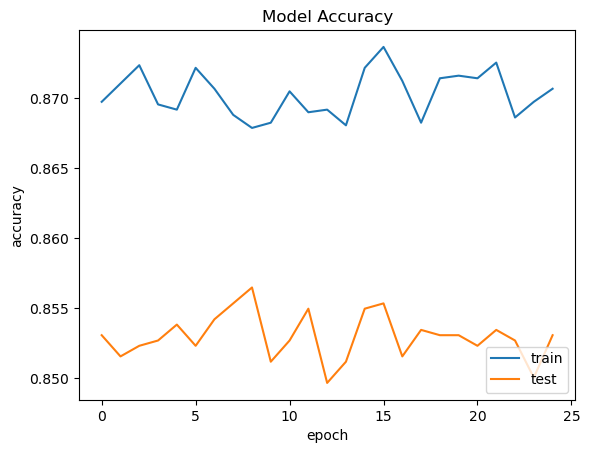

In [54]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

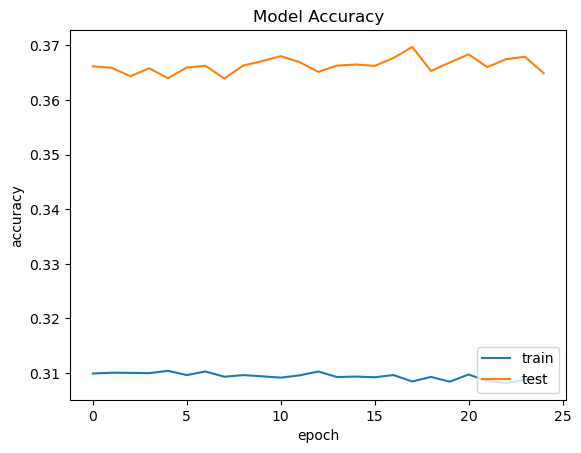

In [45]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Predicting test results

In [55]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred >= 0.5)           ## greater than or equal to 0.5 is considered as 1

In [64]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [57]:
cm

array([[1540,   55],
       [ 219,  186]], dtype=int64)

## Accuracy

In [58]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.863

## Weights 
what are the weights values used in the artificial neural network

In [65]:
classifier.get_weights()

[array([[-0.40950426, -0.00407047,  0.2133136 , -0.20591713,  0.59072953,
         -0.11940683,  0.07668844, -0.02147965,  0.08281974, -0.06968062,
          0.14231443],
        [-0.14812018, -0.51986015, -0.2303464 , -0.07024839, -0.67154014,
          1.2733725 ,  0.15535937, -0.04301655,  0.9550407 , -0.23108184,
          0.67809623],
        [-0.15087266, -0.03077992,  0.28654218, -0.13008131,  0.01416048,
         -0.13036841, -0.20814654,  0.08302941,  0.3294548 , -0.08117127,
         -0.04984406],
        [-0.08940496,  0.05239976, -0.83340275,  0.82842064,  0.12166319,
         -0.63692605,  0.00823742, -0.28118744,  0.16131221,  0.04681853,
          0.81561905],
        [ 0.10998245,  1.3270016 , -0.32670152,  0.11833709, -0.19314885,
         -0.66150445,  0.78746784, -0.8678222 ,  0.37860915,  0.00758772,
          0.5813112 ],
        [-0.44885948, -0.40784505, -0.32541364, -0.35790336,  0.64934033,
         -0.13661873,  0.03192747,  0.02040868, -0.2066159 ,  0.4774505